# AI for Earth Land Cover Mapping APIs
Sample notebook to show how to use the AI for Earth Land Cover Mapping APIs

In [1]:
# import Python Libraries
from PIL import Image
from io import BytesIO
import requests


# AI For Earth Land Cover Mapping APIs

In [2]:
# Specify the subscription key and header constants
SUBSCRIPTION_KEY = '38013f01432e404d84b731ee168e2185' 
AUTHORIZATION_HEADER = 'Ocp-Apim-Subscription-Key'
CONTENT_TYPE = "Content-Type"
TIFF_CONTENT_TYPE = 'image/tiff'

# Specify the url for AI for Earth APIs
base_url = 'https://aiforearth.azure-api.net/v0.1'
classify_format = '{0}/landcover/classify?type={1}'
classify_details_format = '{0}/landcover/details?type={1}'

## Helper Methods 

In [3]:
# Helper methods to create request URLs
def build_classify_url(file_type='jpeg', base_url=base_url):
    return classify_format.format(base_url, file_type)

def build_details_url(file_type='jpeg', base_url=base_url):
    return classify_details_format.format(base_url, file_type)

def get_api_headers(content_type):
    return { AUTHORIZATION_HEADER: SUBSCRIPTION_KEY, CONTENT_TYPE: content_type }

# Method that talks directly to the landcover service
def classify_image(input_path):
    img = open(input_path, mode='rb').read()
    url = build_classify_url()

    print("POST {0}".format(url))
    r = requests.post(url, headers=get_api_headers(TIFF_CONTENT_TYPE), data=img) 

    print("RESPONSE: {0}".format(r.status_code))
    return Image.open(BytesIO(r.content))

def classify_image_details(input_path):
    img = open(input_path, mode='rb').read()
    url = build_details_url()

    print("POST Request to {0}".format(url))
    r = requests.post(url, headers=get_api_headers(TIFF_CONTENT_TYPE), data=img) 

    print("Request returned status: {0}".format(r.status_code))
    return r.json()



# Land Cover Mapping for ESRI NAIP Images

In [14]:
# Define input images
images = ['../images/kent_island-2015-MD.tif', '../images/roosevelt_island-2013-NJ.tif', '../images/north_redmond-2013-WA.tif']


In [15]:
# Perform classification and generate the output image
# Save Locally
for tif_path in images:
   print('Image {0}'.format(tif_path))
   image = classify_image(tif_path)
   image.save(tif_path.replace('tif', 'jpg'))

Image ../images/kent_island-2015-MD.tif
POST https://aiforearth.azure-api.net/v0.1/landcover/classify?type=jpeg
RESPONSE: 200
Image ../images/roosevelt_island-2013-NJ.tif
POST https://aiforearth.azure-api.net/v0.1/landcover/classify?type=jpeg
RESPONSE: 200
Image ../images/north_redmond-2013-WA.tif
POST https://aiforearth.azure-api.net/v0.1/landcover/classify?type=jpeg
RESPONSE: 200


In [7]:
%matplotlib inline


In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import numpy as np

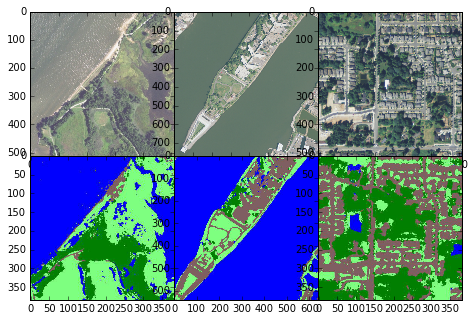

In [27]:
# Show Result of classification
gs = gridspec.GridSpec(2, 3, top=1., bottom=0., right=1., left=0., hspace=0.,wspace=0.)

i = 0

for image in images:
    ax1 = plt.subplot(gs[i])
    img = mpimg.imread(image) 
    ax1.imshow(img[:,:,:-1])
    i +=1

for image in images:
    ax1 = plt.subplot(gs[i])
    img = mpimg.imread(image.replace('tif', 'jpg'))
    ax1.imshow(img)
    i +=1

# Get the land cover mapping details
Show how to get the breakdown of land cover mapping by percentage

In [29]:
# Perform classification and get the percentage breakdown for 1 image
print("Land Cover Mapping Details for {0}".format(images[0]))
results = classify_image_details(images[0])

Land Cover Mapping Details for ../images/kent_island-2015-MD.tif
POST Request to https://aiforearth.azure-api.net/v0.1/landcover/details?type=jpeg
Request returned status: 200


In [30]:
values = list(results['label_breakdown'].values())
names = list(results['label_breakdown'].keys())

In [31]:
# convert the key-value pair to a dataframe
import pandas as pd
landuse = pd.DataFrame(
    {'label': names,
     'value': values
    })

landuse

,label,value
0,Herbaceous,0.356900
1,Barren/impervious,0.026042
2,Water,0.433397
3,Trees,0.183662
4,No Data,0.000000


In [34]:
# Visualize the breakdown of land cover
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")


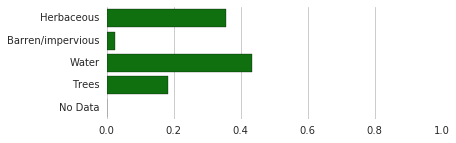

In [35]:
f, ax = plt.subplots(figsize=(6,2))
sns.barplot(x="value", y="label", data=landuse, color="g")
ax.set(xlim=(0.0, 1.0), ylabel="",xlabel="")
sns.despine(left=True, bottom=True)

plt.show()